In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df_ercot = pd.read_csv("../example_data/energy/ERCOT_load_2004_2021Sept.csv")
df_ercot.head()

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,y
0,2004-01-01 01:00:00,7225.09,877.79,1044.89,745.79,7124.21,1660.45,3639.12,654.61,22971.94
1,2004-01-01 01:59:00,6994.25,850.75,1032.04,721.34,6854.58,1603.52,3495.16,639.88,22191.52
2,2004-01-01 03:00:00,6717.42,831.63,1021.10,699.70,6639.48,1527.99,3322.70,623.42,21383.44
3,2004-01-01 04:00:00,6554.27,823.56,1015.41,691.84,6492.39,1473.89,3201.72,613.49,20866.56
4,2004-01-01 04:59:00,6511.19,823.38,1009.74,686.76,6452.26,1462.76,3163.74,613.32,20723.15


In [19]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})

In [20]:
# df[df["ds"].duplicated(keep=False)]

In [21]:
print(len(df))
to_remove = df["ds"].duplicated(keep="first")
df = df[~to_remove]
print(len(df))

154871
154854


# Baseline Model

In [6]:
m = NeuralProphet()
metrics = m.fit(df, freq="H")

INFO - (NP.forecaster.single_handle_missing_data) - dropped 1 NAN row in 'y'
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 51


  0%|          | 0/359 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.20E-02, min: 1.55E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 5.57E-01
Epoch[51/51]: 100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [01:38<00:00,  1.93s/it, SmoothL1Loss=0.00806, MAE=3.76e+3, MSE=2.33e+7, RegLoss=0]


,SmoothL1Loss,MAE,MSE,RegLoss
0,0.249031,15902.928459,1.328663e+09,0.0
1,0.008813,3929.851963,2.550340e+07,0.0
2,0.009984,4192.629079,2.888928e+07,0.0
3,0.012275,4659.890383,3.551891e+07,0.0
4,0.015229,5227.044723,4.406687e+07,0.0
5,0.018220,5720.368865,5.272283e+07,0.0
6,0.025571,6775.212475,7.399647e+07,0.0
7,0.028910,7188.447390,8.366009e+07,0.0
8,0.037328,8175.877682,1.080474e+08,0.0
9,0.046586,9103.249805,1.349188e+08,0.0


In [9]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)

In [10]:
forecast = m.predict(future)

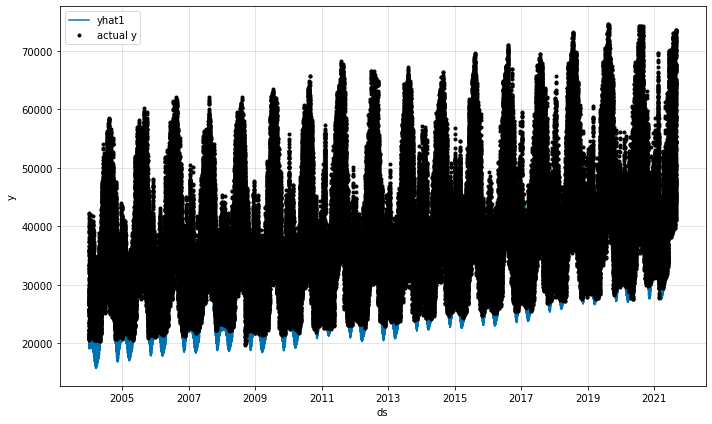

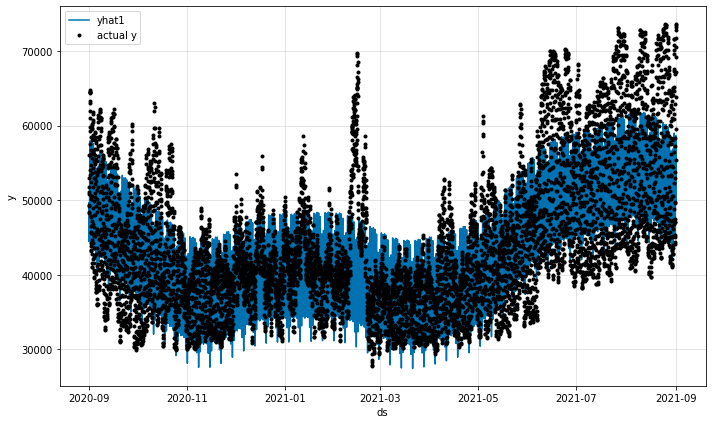

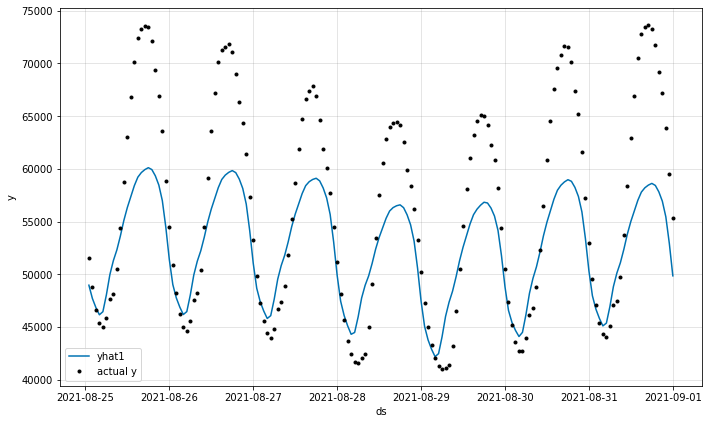

In [15]:
fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])

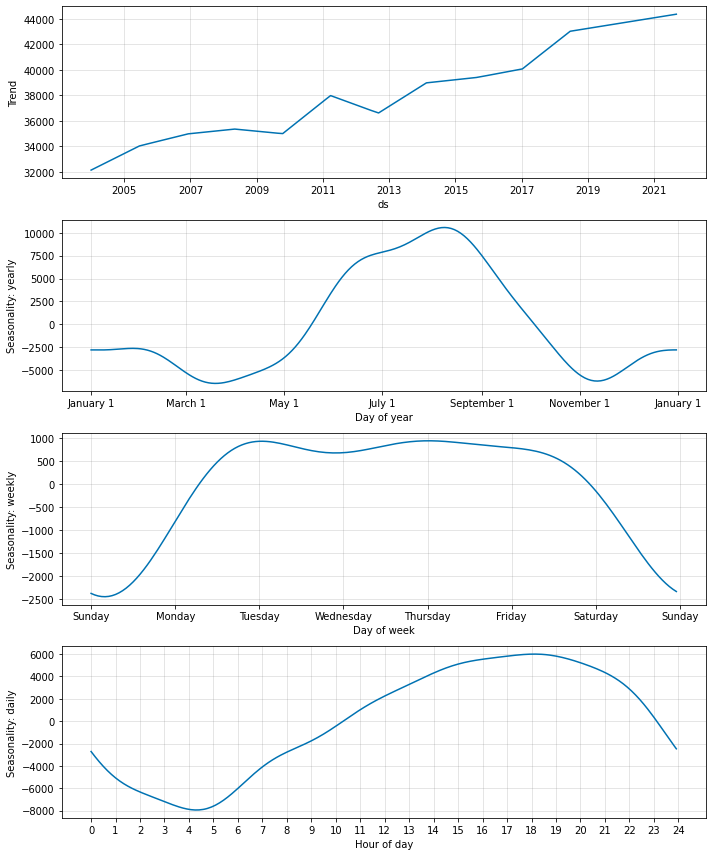

In [16]:
comp = m.plot_components(forecast)
# param = m.plot_parameters()

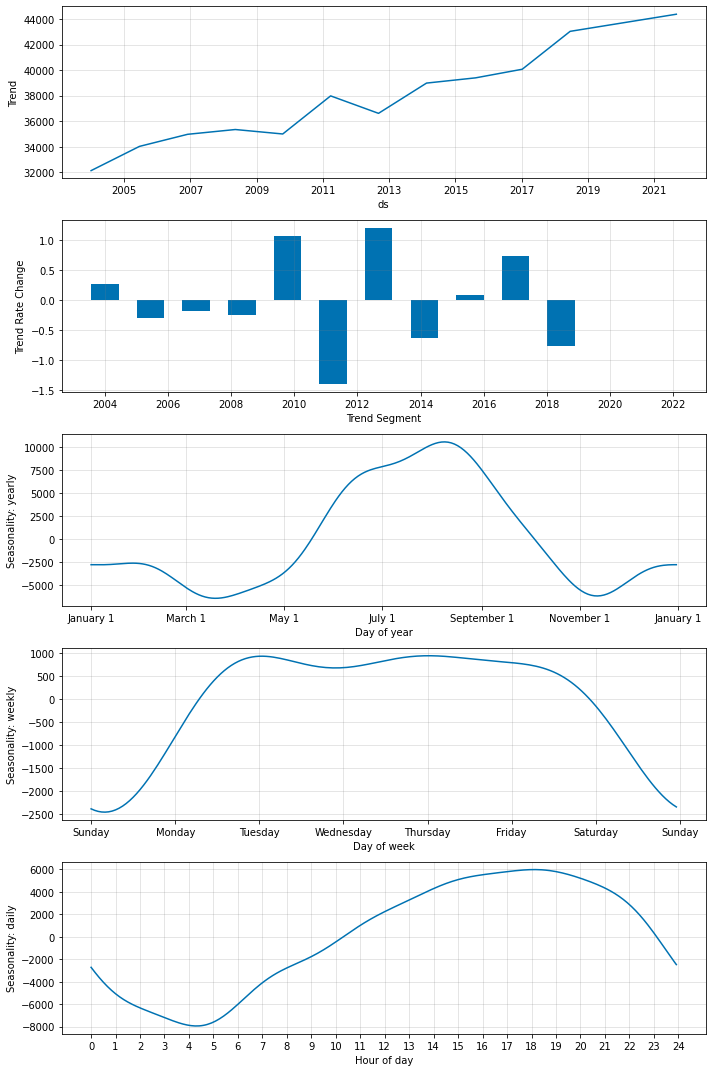

#  AR Model

In [ ]:
m = NeuralProphet(
    n_lags=72,
    learning_rate= 0.01,
)
metrics = m.fit(df, freq="H")

INFO - (NP.forecaster.single_handle_missing_data) - 18 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 17541 NaN values in column y were auto-imputed.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 51
Epoch[4/51]:   8%|██████▍                                                                           | 4/51 [00:08<01:41,  2.15s/it, SmoothL1Loss=0.00183, MAE=1.73e+3, MSE=5.29e+6, RegLoss=0]

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)

In [ ]:
fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])

In [ ]:
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()